## Homework 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week

<ipython-input-50-a788c5e66b53>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


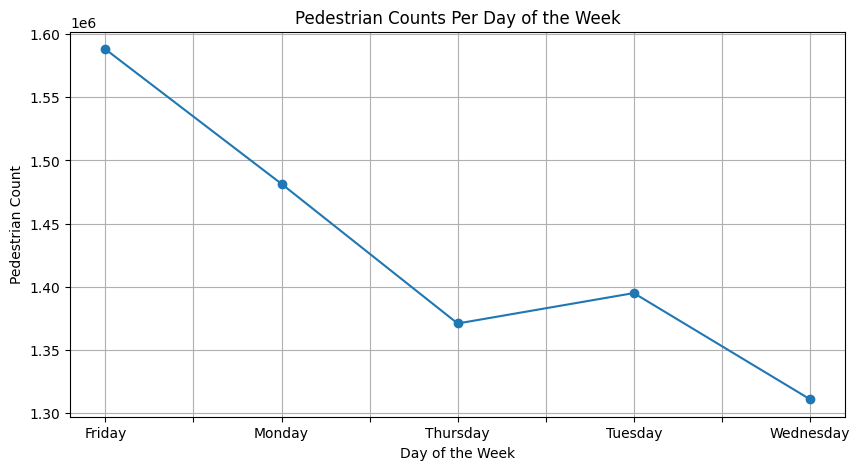

In [ ]:
df = pd.read_csv('/content/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv')
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['DayOfWeek'] = df['hour_beginning'].dt.dayofweek
weekdays_df = df[df['DayOfWeek'].isin(range(5))]
weekdays = weekdays_df.groupby(weekdays_df['hour_beginning'].dt.day_name())
ped_count_per_day = weekdays['Pedestrians'].sum()

plt.figure(figsize=(10,5))
ped_count_per_day.plot(kind='line', marker='o')
plt.title('Pedestrian Counts Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.show()

#### 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

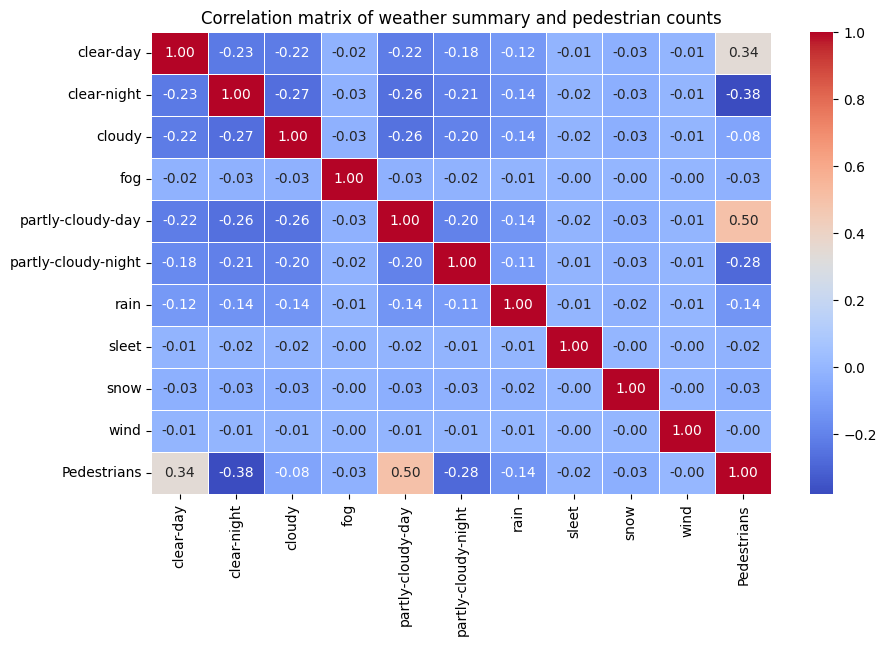

In [ ]:
import seaborn as sns

brooklyn_bridge_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

weather_encoded = pd.get_dummies(brooklyn_bridge_2019['weather_summary'])

# Combine weather encoded with Pedestrians in 2019
encoded = pd.concat([weather_encoded, brooklyn_bridge_2019['Pedestrians']], axis=1)

matrix = encoded.corr()

plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix of weather summary and pedestrian counts')
plt.show()

#### 3.  Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [ ]:
def customize_day(hour):
  if 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 18:
    return 'Afternoon'
  elif 18 <= hour < 24:
    return 'Evening'
  else:
    return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(customize_day)

ped_count_per_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum()

print("Pedestrian Activity Patterns Throughout the Day:")
print(ped_count_per_time_of_day)

Pedestrian Activity Patterns Throughout the Day:
time_of_day
Afternoon    6803093
Evening      1710794
Morning      2466776
Night          52203
Name: Pedestrians, dtype: int64
